In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.stats import pearsonr
from sklearn.cluster import KMeans
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage
fixed_acidity = 'fixed acidity'
volatile_acidity = 'volatile acidity'
citric_acid = 'citric acid'
residual_sugar = 'residual sugar'
chlorides = 'chlorides'
free_sulfur_dioxide = 'free sulfur dioxide'
total_sulfur_dioxide = 'total sulfur dioxide'
density = 'density'
pH = 'pH'
sulphates = 'sulphates'
alcohol = 'alcohol'
quality = 'quality'
qclass = 'qclass'

In [2]:
white = pd.read_csv("data/winequality-white1.csv")

Normalisierter Datensatz zwischen 0 und 1 unter white_norm

In [3]:
white_norm=(white-white.min())/(white.max()-white.min())
white_norm.describe().style.set_precision(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898
mean,0.2937,0.1944,0.2013,0.08883,0.1091,0.1161,0.3001,0.1334,0.4257,0.3138,0.4055,0.4797
std,0.08114,0.09882,0.0729,0.07779,0.06483,0.05926,0.0986,0.05766,0.1373,0.1327,0.1985,0.1476
min,0,0,0,0,0,0,0,0,0,0,0,0
25%,0.2404,0.1275,0.1627,0.01687,0.08012,0.07317,0.2297,0.08892,0.3364,0.2209,0.2419,0.3333
50%,0.2885,0.1765,0.1928,0.07055,0.1009,0.1115,0.29,0.1278,0.4182,0.2907,0.3871,0.5
75%,0.3365,0.2353,0.2349,0.1426,0.1217,0.1533,0.3666,0.1733,0.5091,0.3837,0.5484,0.5
max,1,1,1,1,1,1,1,1,1,1,1,1


In [4]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
white.describe().style.set_precision(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898
mean,6.855,0.2782,0.3342,6.391,0.04577,35.31,138.4,0.994,3.188,0.4898,10.51,5.878
std,0.8439,0.1008,0.121,5.072,0.02185,17.01,42.5,0.002991,0.151,0.1141,1.231,0.8856
min,3.8,0.08,0,0.6,0.009,2,9,0.9871,2.72,0.22,8,3
25%,6.3,0.21,0.27,1.7,0.036,23,108,0.9917,3.09,0.41,9.5,5
50%,6.8,0.26,0.32,5.2,0.043,34,134,0.9937,3.18,0.47,10.4,6
75%,7.3,0.32,0.39,9.9,0.05,46,167,0.9961,3.28,0.55,11.4,6
max,14.2,1.1,1.66,65.8,0.346,289,440,1.039,3.82,1.08,14.2,9


6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64


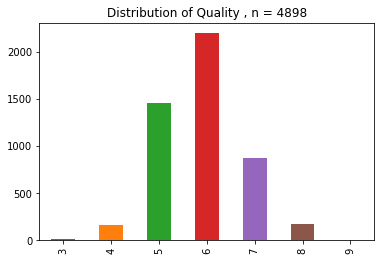

In [6]:
print(white['quality'].value_counts())
white['quality'].value_counts().sort_index().plot(kind='bar', title='Distribution of Quality , n = '+str(white['quality'].count()))
plt.show()

Vorschlag für die Klassen: 3,4,5 (bad); 6 (average); 7,8,9 (good)

In [7]:
print('Share of rating 8 and up')
print(white.quality[white.quality > 7].count())
print(white.quality[white.quality <= 7].count())
print(str(white.quality[white.quality > 7].count()/white.quality.count()*100)+' %')

Share of rating 8 and up
180
4718
3.6749693752552064 %


In [8]:
print('Share of Rating 7 and up')
print(white.quality[white.quality > 6].count())
print(white.quality[white.quality <= 6].count())
print(str(white.quality[white.quality > 6].count()/white.quality.count()*100)+' %')

Share of Rating 7 and up
1060
3838
21.641486320947326 %


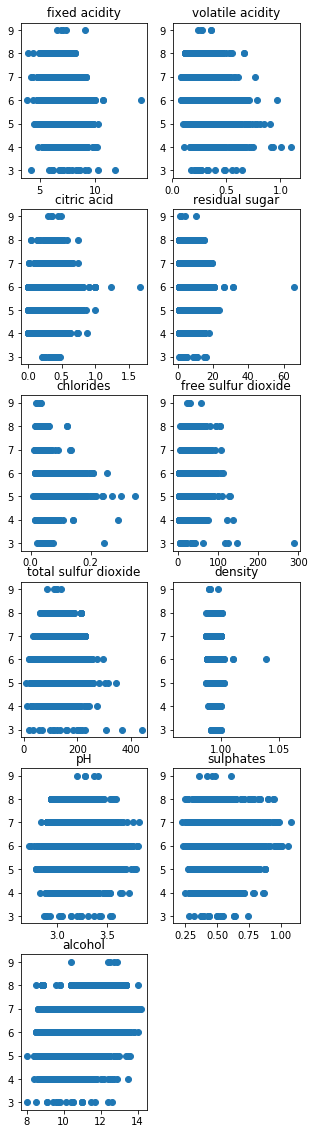

In [9]:
plt.figure(5,(5,20))
plot_y = white['quality']
i=1
curr_subplot={}
for k in white.keys():
    plot_x = white[k]
    curr_subplot[k] = plt.subplot(6,2,i)
    i = i + 1
    curr_subplot[k].set_title(k)
    curr_subplot[k].scatter(x=plot_x, y=plot_y)
curr_subplot['quality'].set_visible(False)

In [10]:
wcorr = white.corr()
wcorr.style.background_gradient().set_precision(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1,-0.02,0.3,0.09,0.02,-0.05,0.09,0.3,-0.4,-0.02,-0.1,-0.1
volatile acidity,-0.02,1,-0.1,0.06,0.07,-0.1,0.09,0.03,-0.03,-0.04,0.07,-0.2
citric acid,0.3,-0.1,1,0.09,0.1,0.09,0.1,0.1,-0.2,0.06,-0.08,-0.009
residual sugar,0.09,0.06,0.09,1,0.09,0.3,0.4,0.8,-0.2,-0.03,-0.5,-0.1
chlorides,0.02,0.07,0.1,0.09,1,0.1,0.2,0.3,-0.09,0.02,-0.4,-0.2
free sulfur dioxide,-0.05,-0.1,0.09,0.3,0.1,1,0.6,0.3,-0.0006,0.06,-0.3,0.008
total sulfur dioxide,0.09,0.09,0.1,0.4,0.2,0.6,1,0.5,0.002,0.1,-0.4,-0.2
density,0.3,0.03,0.1,0.8,0.3,0.3,0.5,1,-0.09,0.07,-0.8,-0.3
pH,-0.4,-0.03,-0.2,-0.2,-0.09,-0.0006,0.002,-0.09,1,0.2,0.1,0.1
sulphates,-0.02,-0.04,0.06,-0.03,0.02,0.06,0.1,0.07,0.2,1,-0.02,0.05


In [11]:
for k1 in white.keys():
    print(k1+' (significance): ')
    for k2 in white.keys():
        print('\t'+k2+' '+ str(1-pearsonr(x=white[k1],y=white[k2])[1]))


fixed acidity (significance): 
	fixed acidity 1.0
	volatile acidity 0.8877781336120031
	citric acid 1.0
	residual sugar 0.9999999995651634
	chlorides 0.8937906429679209
	free sulfur dioxide 0.999456269229728
	total sulfur dioxide 0.9999999998288562
	density 1.0
	pH 1.0
	sulphates 0.7696842687474281
	alcohol 1.0
	quality 0.9999999999999986
volatile acidity (significance): 
	fixed acidity 0.8877781336120031
	volatile acidity 1.0
	citric acid 1.0
	residual sugar 0.9999932877615835
	chlorides 0.9999992175392508
	free sulfur dioxide 0.9999999999898084
	total sulfur dioxide 0.9999999996097031
	density 0.9422309379891687
	pH 0.9744918251110936
	sulphates 0.9876023856071944
	alcohol 0.9999978996832742
	quality 1.0
citric acid (significance): 
	fixed acidity 1.0
	volatile acidity 1.0
	citric acid 1.0
	residual sugar 0.9999999999606441
	chlorides 0.999999999999999
	free sulfur dioxide 0.9999999999580483
	total sulfur dioxide 1.0
	density 1.0
	pH 1.0
	sulphates 0.9999873113619032
	alcohol 0.99999

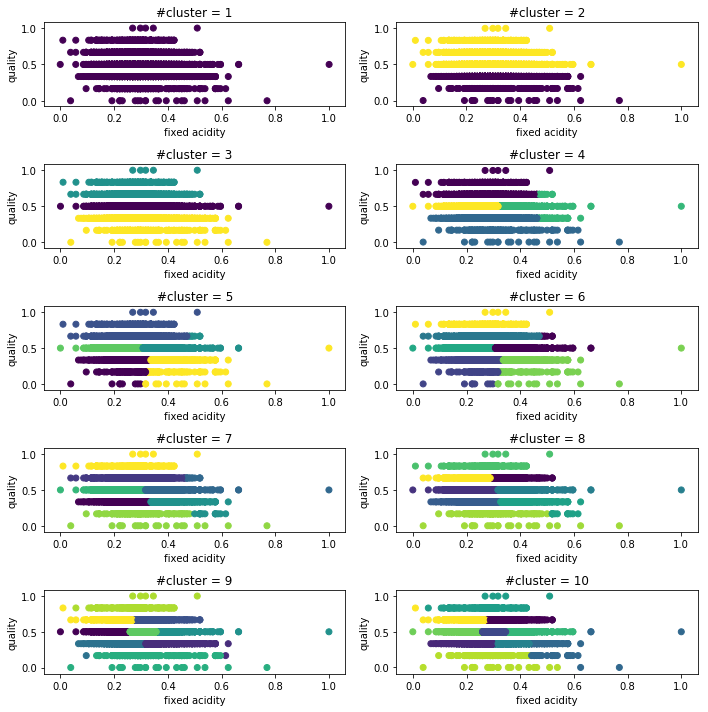

In [27]:
v1= fixed_acidity
v2= quality

plt.figure(1, (10,10))
for i in range(1,11):
    estimator = KMeans(n_clusters = i)
    estimator.fit(white_norm.loc[:,[v1,v2]])
    plt.subplot(5,2,i)
    plt.tight_layout() # automatically adjusts subplot params so that the subplot(s) fits in to the figure area
    plt.title("#cluster = {}".format(i))
    plt.xlabel(v1)
    plt.ylabel(v2)
    plt.scatter(white_norm[v1], white_norm[v2], c=estimator.labels_)
#    for i, row in white_norm.iterrows():
#        # print("i= {} ; row = {}".format(i, row))
#        plt.annotate(row[quality],
#                     (row[v1], row[v2]), 
#                     xytext=(row[v1] + 0.5, row[v2] + 0.5))
plt.show()

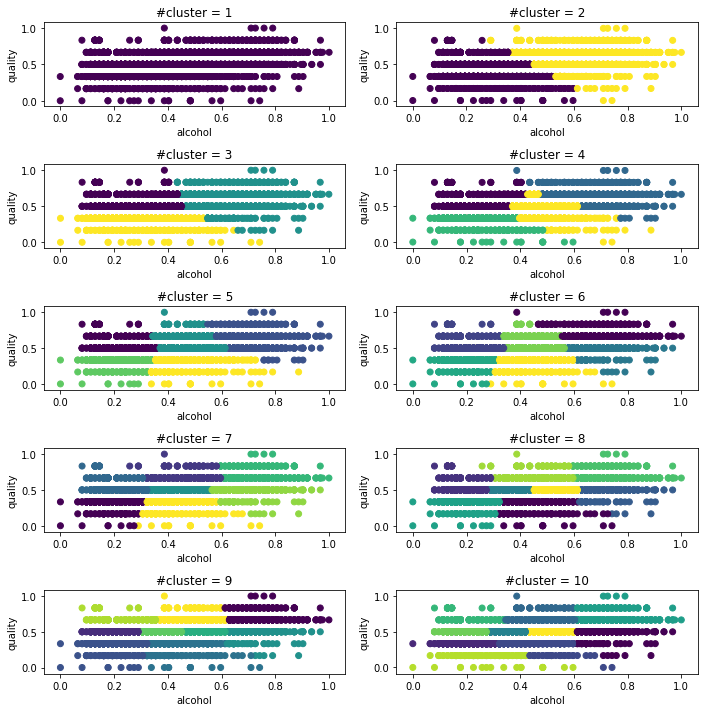

In [28]:
v1= alcohol
v2= quality

plt.figure(1, (10,10))
for i in range(1,11):
    estimator = KMeans(n_clusters = i)
    estimator.fit(white_norm.loc[:,[v1,v2]])
    plt.subplot(5,2,i)
    plt.tight_layout() # automatically adjusts subplot params so that the subplot(s) fits in to the figure area
    plt.title("#cluster = {}".format(i))
    plt.xlabel(v1)
    plt.ylabel(v2)
    plt.scatter(white_norm[v1], white_norm[v2], c=estimator.labels_)
#    for i, row in white_norm.iterrows():
#        # print("i= {} ; row = {}".format(i, row))
#        plt.annotate(row[quality],
#                     (row[v1], row[v2]), 
#                     xytext=(row[v1] + 0.5, row[v2] + 0.5))
plt.show()

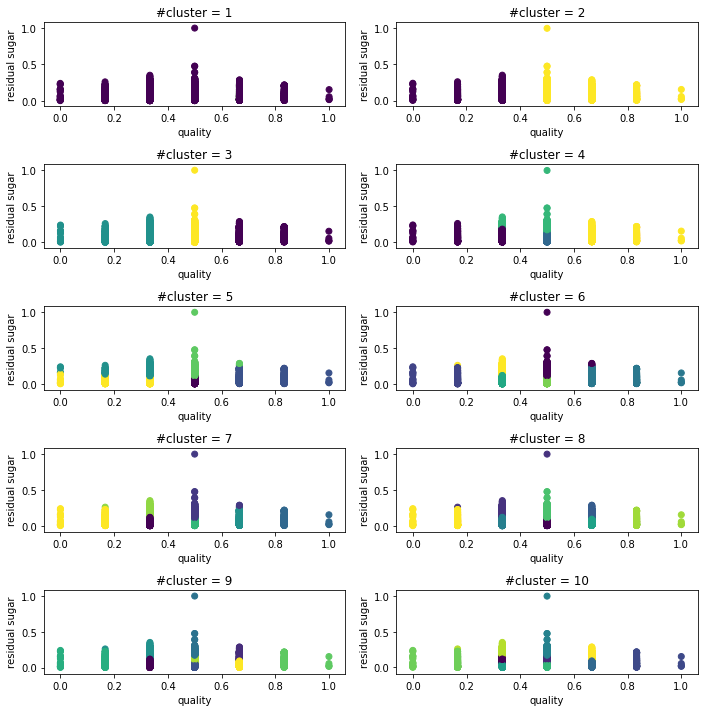

In [29]:
v1= quality
v2= residual_sugar

plt.figure(1, (10,10))
for i in range(1,11):
    estimator = KMeans(n_clusters = i)
    estimator.fit(white_norm.loc[:,[v1,v2]])
    plt.subplot(5,2,i)
    plt.tight_layout() # automatically adjusts subplot params so that the subplot(s) fits in to the figure area
    plt.title("#cluster = {}".format(i))
    plt.xlabel(v1)
    plt.ylabel(v2)
    plt.scatter(white_norm[v1], white_norm[v2], c=estimator.labels_)
#    for i, row in white_norm.iterrows():
#        # print("i= {} ; row = {}".format(i, row))
#        plt.annotate(row[quality],
#                     (row[v1], row[v2]), 
#                     xytext=(row[v1] + 0.5, row[v2] + 0.5))
plt.show()

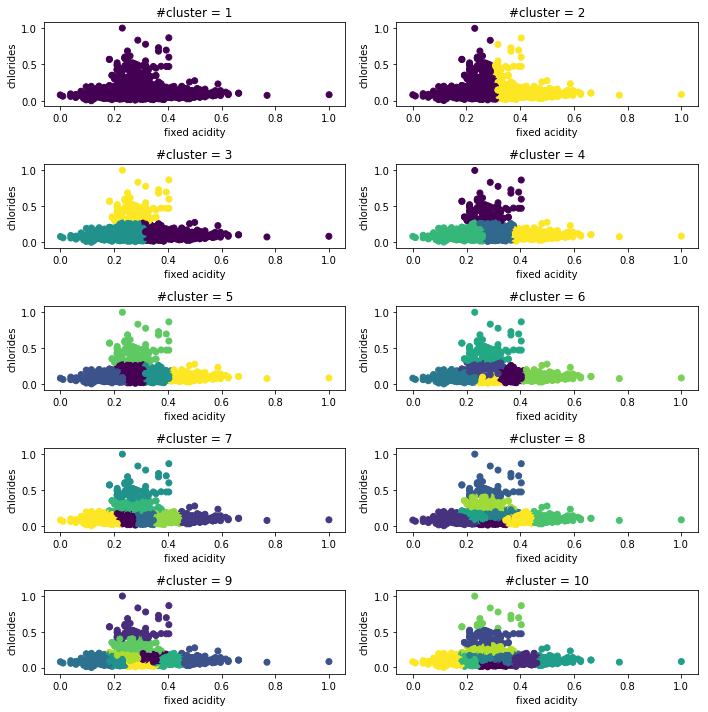

In [15]:
v1= fixed_acidity
v2= chlorides

plt.figure(1, (10,10))
for i in range(1,11):
    estimator = KMeans(n_clusters = i)
    estimator.fit(white_norm.loc[:,[v1,v2]])
    plt.subplot(5,2,i)
    plt.tight_layout() # automatically adjusts subplot params so that the subplot(s) fits in to the figure area
    plt.title("#cluster = {}".format(i))
    plt.xlabel(v1)
    plt.ylabel(v2)
    plt.scatter(white_norm[v1], white_norm[v2], c=estimator.labels_)
#    for i, row in white_norm.iterrows():
#        # print("i= {} ; row = {}".format(i, row))
#        plt.annotate(row[quality],
#                     (row[v1], row[v2]), 
#                     xytext=(row[v1] + 0.5, row[v2] + 0.5))
plt.show()

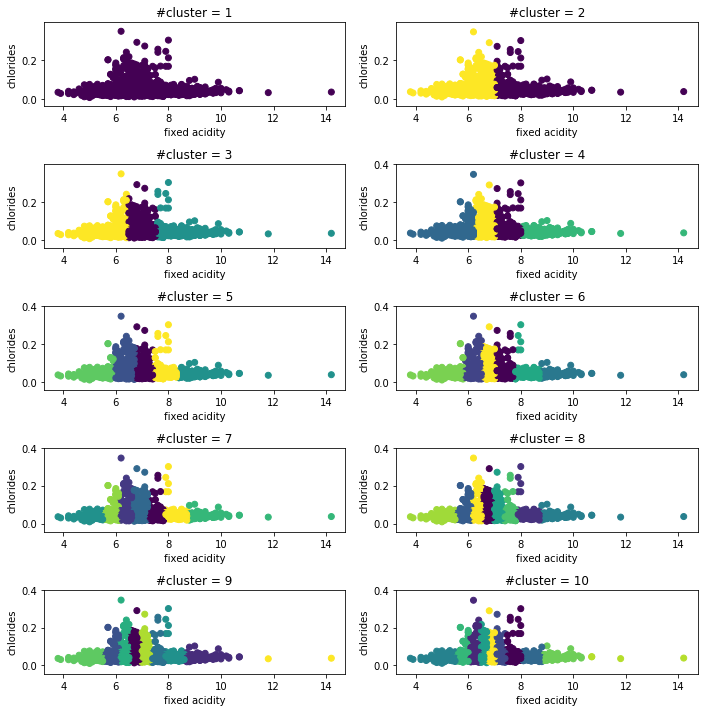

In [16]:
v1= fixed_acidity
v2= chlorides

plt.figure(1, (10,10))
for i in range(1,11):
    estimator = KMeans(n_clusters = i)
    estimator.fit(white.loc[:,[v1,v2]])
    plt.subplot(5,2,i)
    plt.tight_layout() # automatically adjusts subplot params so that the subplot(s) fits in to the figure area
    plt.title("#cluster = {}".format(i))
    plt.xlabel(v1)
    plt.ylabel(v2)
    plt.scatter(white[v1], white[v2], c=estimator.labels_)
#    for i, row in white_norm.iterrows():
#        # print("i= {} ; row = {}".format(i, row))
#        plt.annotate(row[quality],
#                     (row[v1], row[v2]), 
#                     xytext=(row[v1] + 0.5, row[v2] + 0.5))
plt.show()

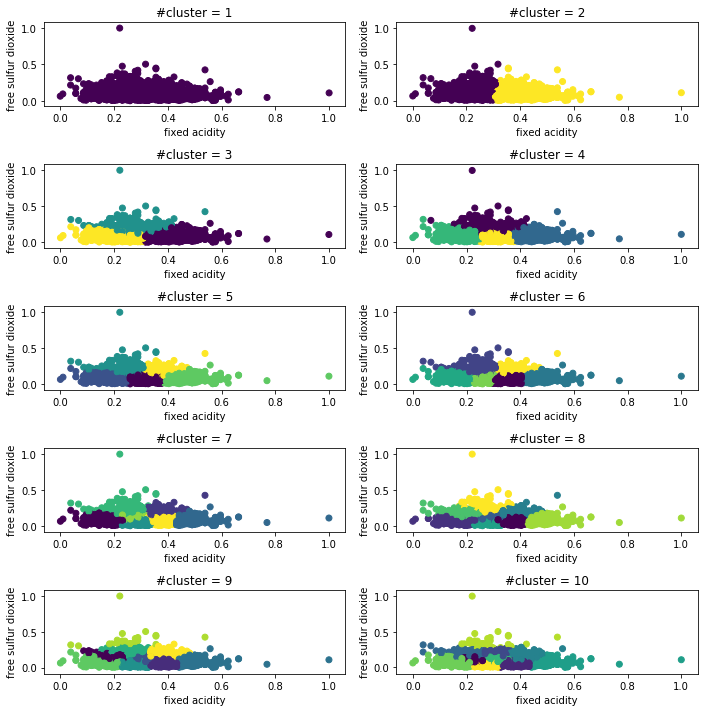

In [17]:
v1= fixed_acidity
v2= free_sulfur_dioxide

plt.figure(1, (10,10))
for i in range(1,11):
    estimator = KMeans(n_clusters = i)
    estimator.fit(white_norm.loc[:,[v1,v2]])
    plt.subplot(5,2,i)
    plt.tight_layout() # automatically adjusts subplot params so that the subplot(s) fits in to the figure area
    plt.title("#cluster = {}".format(i))
    plt.xlabel(v1)
    plt.ylabel(v2)
    plt.scatter(white_norm[v1], white_norm[v2], c=estimator.labels_)
#    for i, row in white_norm.iterrows():
#        # print("i= {} ; row = {}".format(i, row))
#        plt.annotate(row[quality],
#                     (row[v1], row[v2]), 
#                     xytext=(row[v1] + 0.5, row[v2] + 0.5))
plt.show()

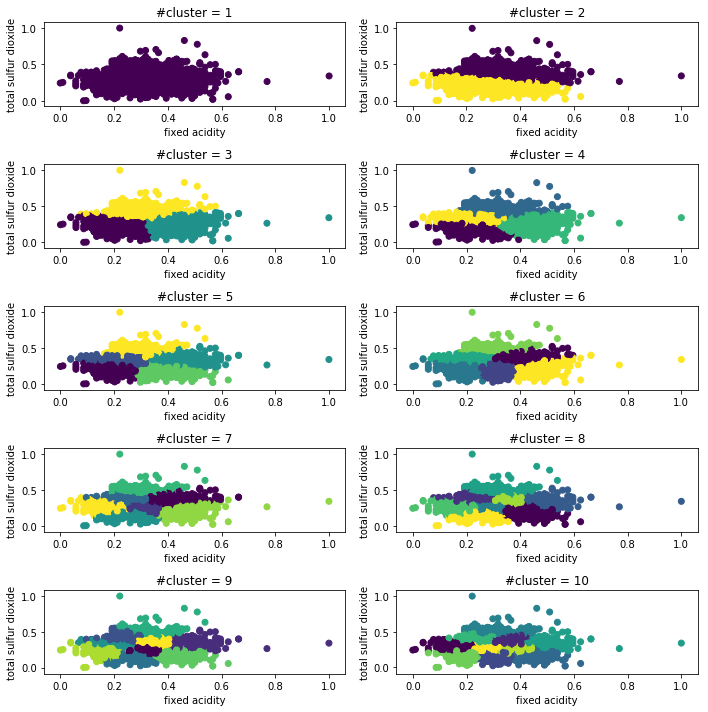

In [18]:
v1= fixed_acidity
v2= total_sulfur_dioxide

plt.figure(1, (10,10))
for i in range(1,11):
    estimator = KMeans(n_clusters = i)
    estimator.fit(white_norm.loc[:,[v1,v2]])
    plt.subplot(5,2,i)
    plt.tight_layout() # automatically adjusts subplot params so that the subplot(s) fits in to the figure area
    plt.title("#cluster = {}".format(i))
    plt.xlabel(v1)
    plt.ylabel(v2)
    plt.scatter(white_norm[v1], white_norm[v2], c=estimator.labels_)
#    for i, row in white_norm.iterrows():
#        # print("i= {} ; row = {}".format(i, row))
#        plt.annotate(row[quality],
#                     (row[v1], row[v2]), 
#                     xytext=(row[v1] + 0.5, row[v2] + 0.5))
plt.show()

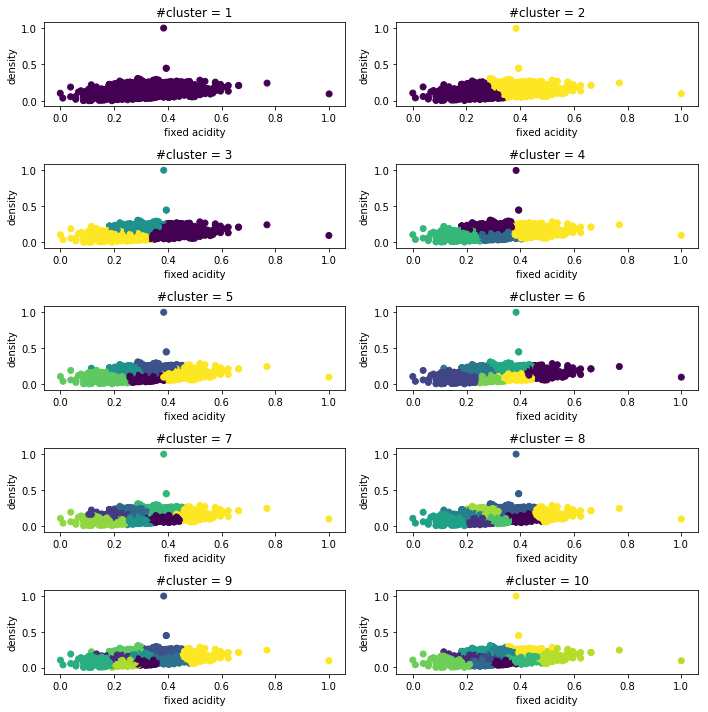

In [19]:
v1= fixed_acidity
v2= density

plt.figure(1, (10,10))
for i in range(1,11):
    estimator = KMeans(n_clusters = i)
    estimator.fit(white_norm.loc[:,[v1,v2]])
    plt.subplot(5,2,i)
    plt.tight_layout() # automatically adjusts subplot params so that the subplot(s) fits in to the figure area
    plt.title("#cluster = {}".format(i))
    plt.xlabel(v1)
    plt.ylabel(v2)
    plt.scatter(white_norm[v1], white_norm[v2], c=estimator.labels_)
#    for i, row in white_norm.iterrows():
#        # print("i= {} ; row = {}".format(i, row))
#        plt.annotate(row[quality],
#                     (row[v1], row[v2]), 
#                     xytext=(row[v1] + 0.5, row[v2] + 0.5))
plt.show()

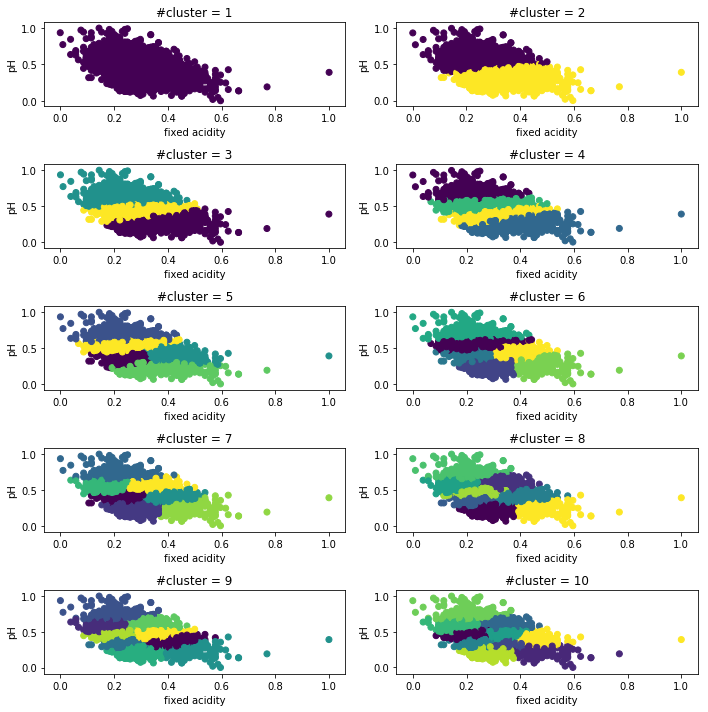

In [20]:
v1= fixed_acidity
v2= pH

plt.figure(1, (10,10))
for i in range(1,11):
    estimator = KMeans(n_clusters = i)
    estimator.fit(white_norm.loc[:,[v1,v2]])
    plt.subplot(5,2,i)
    plt.tight_layout() # automatically adjusts subplot params so that the subplot(s) fits in to the figure area
    plt.title("#cluster = {}".format(i))
    plt.xlabel(v1)
    plt.ylabel(v2)
    plt.scatter(white_norm[v1], white_norm[v2], c=estimator.labels_)
#    for i, row in white_norm.iterrows():
#        # print("i= {} ; row = {}".format(i, row))
#        plt.annotate(row[quality],
#                     (row[v1], row[v2]), 
#                     xytext=(row[v1] + 0.5, row[v2] + 0.5))
plt.show()

In [21]:
conditions = [(white['quality'] < 6),
              (white['quality'] > 6)]
choices = ['low', 'high']
white['class'] = np.select(conditions, choices, default = 'middle')
white['class'].value_counts()

middle    2198
low       1640
high      1060
Name: class, dtype: int64

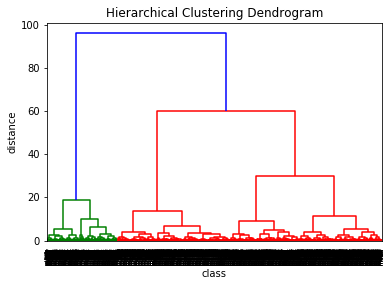

In [22]:
Z = linkage(white[[alcohol, pH]], 'ward')

plt.figure()
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('class')
plt.ylabel('distance')
dendrogram(Z, labels=white['class'].values)
plt.savefig('hierarchy.svg')
plt.show()

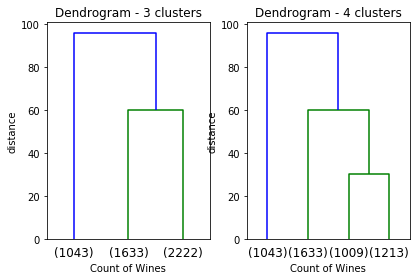

In [23]:
plt.figure()
counter = 1
for i in [3,4]:
    plt.subplot(1,2,counter)
    counter += 1
    plt.tight_layout()
    plt.title('Dendrogram - {} clusters'.format(i))
    plt.xlabel('Count of Wines')
    plt.ylabel('distance')
    dendrogram(Z, truncate_mode='lastp', p=i)
plt.show()

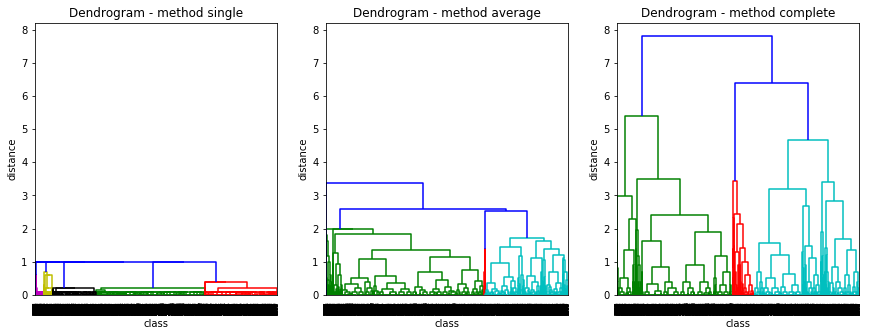

In [24]:
methods = ['single', 'average', 'complete']

plt.figure(1,(20,5))
y_axis = None
for i, method in enumerate(methods):
    y_axis = plt.subplot(1,4,i + 1, sharey = y_axis)
    plt.title('Dendrogram - method {}'.format(method))
    plt.xlabel('class')
    plt.ylabel('distance')
    dendrogram(
        linkage(white[['quality', 'alcohol']], method)
    )
plt.show()

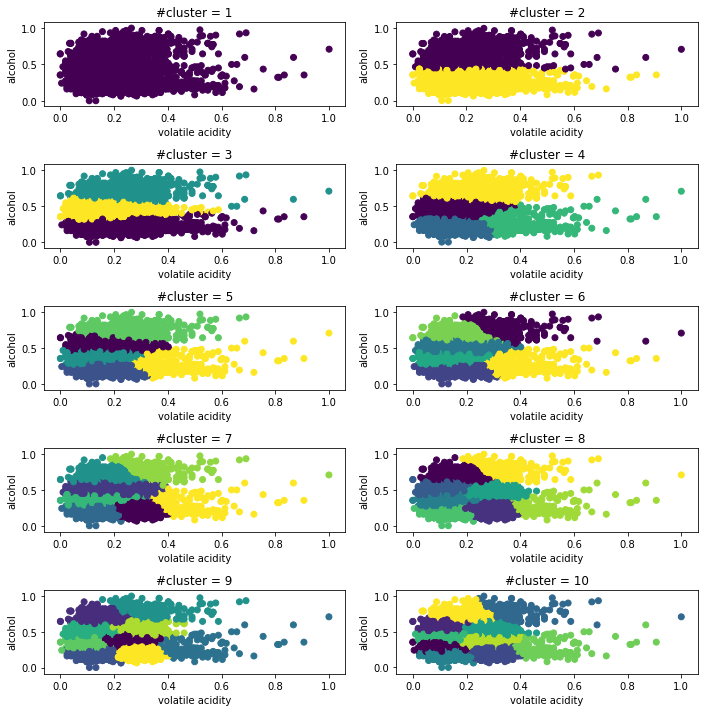

In [25]:
v1= volatile_acidity
v2= alcohol

plt.figure(1, (10,10))
for i in range(1,11):
    estimator = KMeans(n_clusters = i)
    estimator.fit(white_norm.loc[:,[v1,v2]])
    plt.subplot(5,2,i)
    plt.tight_layout() # automatically adjusts subplot params so that the subplot(s) fits in to the figure area
    plt.title("#cluster = {}".format(i))
    plt.xlabel(v1)
    plt.ylabel(v2)
    plt.scatter(white_norm[v1], white_norm[v2], c=estimator.labels_)
#    for i, row in white_norm.iterrows():
#        # print("i= {} ; row = {}".format(i, row))
#        plt.annotate(row[quality],
#                     (row[v1], row[v2]), 
#                     xytext=(row[v1] + 0.5, row[v2] + 0.5))
plt.show()

In [26]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [40]:
white_data = white
white_target = white['class']
white_data = white_data.drop('quality',axis = 1)
white_data = white_data.drop('class', axis = 1)
print(white_data)
print(white_target)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36           20.70      0.045   
1               6.3             0.300         0.34            1.60      0.049   
2               8.1             0.280         0.40            6.90      0.050   
3               7.2             0.230         0.32            8.50      0.058   
4               7.2             0.230         0.32            8.50      0.058   
5               8.1             0.280         0.40            6.90      0.050   
6               6.2             0.320         0.16            7.00      0.045   
7               7.0             0.270         0.36           20.70      0.045   
8               6.3             0.300         0.34            1.60      0.049   
9               8.1             0.220         0.43            1.50      0.044   
10              8.1             0.270         0.41            1.45      0.033   
11              8.6         

In [41]:
white_data_binned = pd.DataFrame(dict(
    fixed_acidity = pd.qcut(white_data['fixed acidity'], q=3, labels=['low', 'middle', 'high']),
    volatile_acidity = pd.qcut(white_data['volatile acidity'], q=3, labels=['low', 'middle', 'high']),
    citric_acid = pd.qcut(white_data['citric acid'], q=3, labels=['low', 'middle', 'high']),
    residual_sugar = pd.qcut(white_data['residual sugar'], q=3, labels=['low', 'middle', 'high']),
    chlorides = pd.qcut(white_data['chlorides'], q=3, labels=['low', 'middle', 'high']),
    free_sulfur_dioxide = pd.qcut(white_data['free sulfur dioxide'], q=3, labels=['low', 'middle', 'high']),
    total_sulfur_dioxide = pd.qcut(white_data['total sulfur dioxide'], q=3, labels=['low', 'middle', 'high']),
    density = pd.qcut(white_data['density'], q=3, labels=['low', 'middle', 'high']),
    pH = pd.qcut(white_data['pH'], q=3, labels=['low', 'middle', 'high']),
    sulphates = pd.qcut(white_data['sulphates'], q=3, labels=['low', 'middle', 'high']),
    alcohol = pd.qcut(white_data['alcohol'], q=3, labels=['low', 'middle', 'high']),
))

In [44]:
white_data_binned_and_encoded = pd.get_dummies(white_data_binned)
print(white_data_binned_and_encoded)

      fixed_acidity_low  fixed_acidity_middle  fixed_acidity_high  \
0                     0                     1                   0   
1                     1                     0                   0   
2                     0                     0                   1   
3                     0                     0                   1   
4                     0                     0                   1   
5                     0                     0                   1   
6                     1                     0                   0   
7                     0                     1                   0   
8                     1                     0                   0   
9                     0                     0                   1   
10                    0                     0                   1   
11                    0                     0                   1   
12                    0                     0                   1   
13                    0           

In [47]:
white_target.head()

0    middle
1    middle
2    middle
3    middle
4    middle
Name: class, dtype: object

In [84]:
#define function for computing average roc for cross validation
#see http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html
from scipy import interp
from sklearn.metrics import roc_curve, auc, accuracy_score 

def avg_roc(cv, estimator, data, target, pos_label):
    mean_fpr = np.linspace(0, 1, 100) # = [0.0, 0.01, 0.02, 0.03, ... , 0.99, 1.0]
    tprs = []
    aucs = []
    
    for train_indices, test_indices in cv.split(data, target):
        train_data = data[train_indices]
        train_target = target[train_indices]
        estimator.fit(train_data, train_target)

        test_data = data[test_indices]
        test_target = target[test_indices]
        decision_for_each_class = estimator.predict_proba(test_data)#have to use predict_proba or decision_function 
        print(accuracy_score(test_target, estimator.predict(test_data)))
        
        fpr, tpr, thresholds = roc_curve(test_target, decision_for_each_class[:,1], pos_label=pos_label)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0 # tprs[-1] access the last element
        aucs.append(auc(fpr, tpr))
        
        #plt.plot(fpr, tpr)# plot for each fold
        
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0 # set the last tpr to 1
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    
    return mean_fpr, mean_tpr, mean_auc, std_auc

0.5714285714285714
0.5836734693877551
0.5163265306122449
0.5387755102040817
0.5285714285714286
0.5265306122448979
0.5387755102040817
0.5551020408163265
0.5153374233128835
0.5541922290388548
0.5530612244897959
0.5755102040816327
0.5204081632653061
0.5428571428571428
0.5204081632653061
0.536734693877551
0.5244897959183673
0.5653061224489796
0.46830265848670755
0.5623721881390593
0.5142857142857142
0.5387755102040817
0.5163265306122449
0.5306122448979592
0.5081632653061224
0.5224489795918368
0.5244897959183673
0.5591836734693878
0.4662576687116564
0.5357873210633947
0.5306122448979592
0.5612244897959183
0.5204081632653061
0.5163265306122449
0.5285714285714286
0.5183673469387755
0.48367346938775513
0.5306122448979592
0.46421267893660534
0.5378323108384458
0.5285714285714286
0.5469387755102041
0.4897959183673469
0.5346938775510204
0.5061224489795918
0.5040816326530613
0.47551020408163264
0.5326530612244897
0.4703476482617587
0.5460122699386503
0.689795918367347
0.6714285714285714
0.63265306

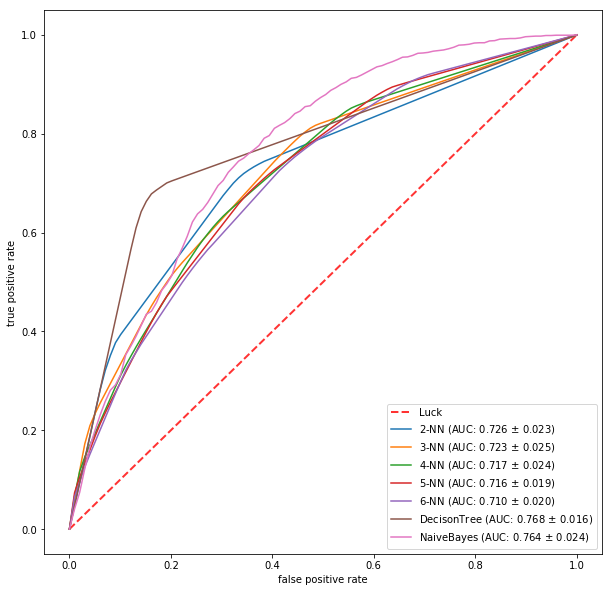

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Luck', alpha=.8) # draw diagonal

for n_neighbour in [2,3,4,5,6]:
    knn_estimator = KNeighborsClassifier(n_neighbour)
    mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, knn_estimator, white_data.values, white_target, 'low')
    plt.plot(mean_fpr, mean_tpr, label='{}-NN (AUC: {:.3f} $\pm$ {:.3f})'.format(n_neighbour, mean_auc, std_auc))
    
decision_tree = tree.DecisionTreeClassifier()
mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, decision_tree, white_data.values, white_target, 'low')
plt.plot(mean_fpr, mean_tpr, label='DecisonTree (AUC: {:.3f} $\pm$ {:.3f})'.format(mean_auc, std_auc))

naive_bayes = GaussianNB()
mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, naive_bayes, white_data.values, white_target, 'low')
plt.plot(mean_fpr, mean_tpr, label='NaiveBayes (AUC: {:.3f} $\pm$ {:.3f})'.format(mean_auc, std_auc))

plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()


0.5714285714285714
0.5836734693877551
0.5163265306122449
0.5387755102040817
0.5285714285714286
0.5265306122448979
0.5387755102040817
0.5551020408163265
0.5153374233128835
0.5541922290388548
0.5530612244897959
0.5755102040816327
0.5204081632653061
0.5428571428571428
0.5204081632653061
0.536734693877551
0.5244897959183673
0.5653061224489796
0.46830265848670755
0.5623721881390593
0.5142857142857142
0.5387755102040817
0.5163265306122449
0.5306122448979592
0.5081632653061224
0.5224489795918368
0.5244897959183673
0.5591836734693878
0.4662576687116564
0.5357873210633947
0.5306122448979592
0.5612244897959183
0.5204081632653061
0.5163265306122449
0.5285714285714286
0.5183673469387755
0.48367346938775513
0.5306122448979592
0.46421267893660534
0.5378323108384458
0.5285714285714286
0.5469387755102041
0.4897959183673469
0.5346938775510204
0.5061224489795918
0.5040816326530613
0.47551020408163264
0.5326530612244897
0.4703476482617587
0.5460122699386503
0.6571428571428571
0.6632653061224489
0.6367346

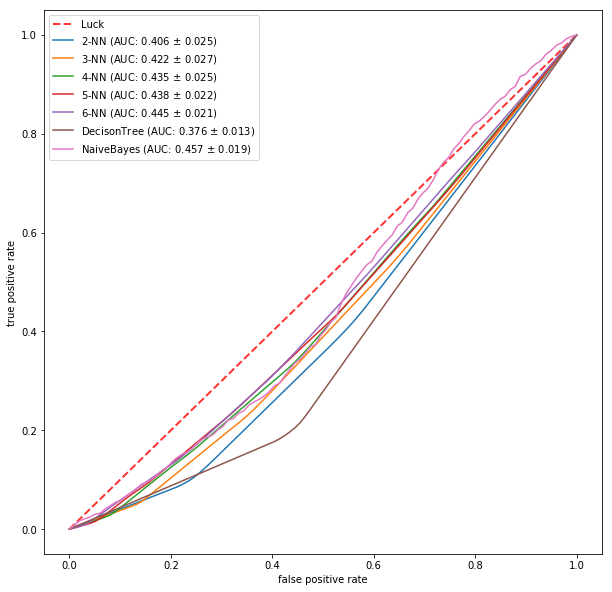

In [86]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Luck', alpha=.8) # draw diagonal

for n_neighbour in [2,3,4,5,6]:
    knn_estimator = KNeighborsClassifier(n_neighbour)
    mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, knn_estimator, white_data.values, white_target, 'middle')
    plt.plot(mean_fpr, mean_tpr, label='{}-NN (AUC: {:.3f} $\pm$ {:.3f})'.format(n_neighbour, mean_auc, std_auc))
    
decision_tree = tree.DecisionTreeClassifier()
mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, decision_tree, white_data.values, white_target, 'middle')
plt.plot(mean_fpr, mean_tpr, label='DecisonTree (AUC: {:.3f} $\pm$ {:.3f})'.format(mean_auc, std_auc))

naive_bayes = GaussianNB()
mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, naive_bayes, white_data.values, white_target, 'middle')
plt.plot(mean_fpr, mean_tpr, label='NaiveBayes (AUC: {:.3f} $\pm$ {:.3f})'.format(mean_auc, std_auc))

plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()

0.5714285714285714
0.5836734693877551
0.5163265306122449
0.5387755102040817
0.5285714285714286
0.5265306122448979
0.5387755102040817
0.5551020408163265
0.5153374233128835
0.5541922290388548
0.5530612244897959
0.5755102040816327
0.5204081632653061
0.5428571428571428
0.5204081632653061
0.536734693877551
0.5244897959183673
0.5653061224489796
0.46830265848670755
0.5623721881390593
0.5142857142857142
0.5387755102040817
0.5163265306122449
0.5306122448979592
0.5081632653061224
0.5224489795918368
0.5244897959183673
0.5591836734693878
0.4662576687116564
0.5357873210633947
0.5306122448979592
0.5612244897959183
0.5204081632653061
0.5163265306122449
0.5285714285714286
0.5183673469387755
0.48367346938775513
0.5306122448979592
0.46421267893660534
0.5378323108384458
0.5285714285714286
0.5469387755102041
0.4897959183673469
0.5346938775510204
0.5061224489795918
0.5040816326530613
0.47551020408163264
0.5326530612244897
0.4703476482617587
0.5460122699386503
0.6653061224489796
0.6714285714285714
0.6306122

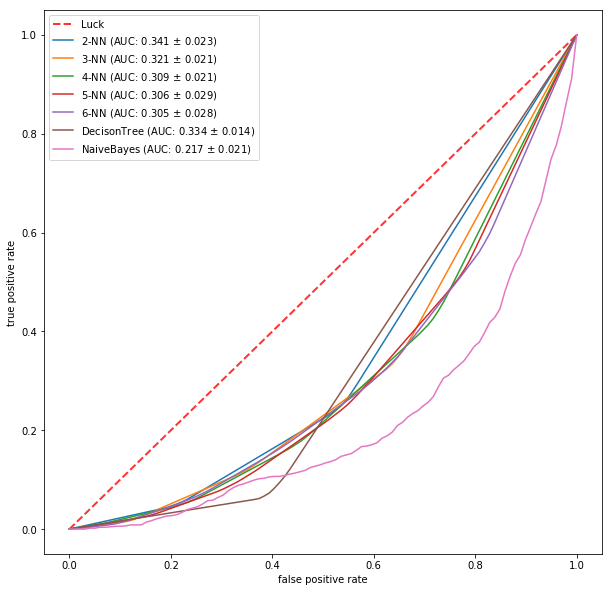

In [87]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Luck', alpha=.8) # draw diagonal

for n_neighbour in [2,3,4,5,6]:
    knn_estimator = KNeighborsClassifier(n_neighbour)
    mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, knn_estimator, white_data.values, white_target, 'high')
    plt.plot(mean_fpr, mean_tpr, label='{}-NN (AUC: {:.3f} $\pm$ {:.3f})'.format(n_neighbour, mean_auc, std_auc))
    
decision_tree = tree.DecisionTreeClassifier()
mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, decision_tree, white_data.values, white_target, 'high')
plt.plot(mean_fpr, mean_tpr, label='DecisonTree (AUC: {:.3f} $\pm$ {:.3f})'.format(mean_auc, std_auc))

naive_bayes = GaussianNB()
mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, naive_bayes, white_data.values, white_target, 'high')
plt.plot(mean_fpr, mean_tpr, label='NaiveBayes (AUC: {:.3f} $\pm$ {:.3f})'.format(mean_auc, std_auc))

plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()